In [2]:
# Import all dependencies 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

import warnings
warnings.filterwarnings('ignore')
import datetime
from datetime import datetime
import requests
import io

Minneapolis Covid-19 Deaths Prediction Model

In [6]:
# load county data
counties = pd.read_csv('us-counties.csv')
counties.tail(5)

,date,county,state,fips,cases,deaths
777715,2020-11-28,Sweetwater,Wyoming,56037.0,1780,6.0
777716,2020-11-28,Teton,Wyoming,56039.0,1570,2.0
777717,2020-11-28,Uinta,Wyoming,56041.0,1037,4.0
777718,2020-11-28,Washakie,Wyoming,56043.0,416,8.0
777719,2020-11-28,Weston,Wyoming,56045.0,396,1.0


In [4]:
# trying to upload raw csv
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv" # Make sure the url is the raw version of the file on GitHub
download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe

df = pd.read_csv(io.StringIO(download.decode('utf-8')))

#call sample
# Reading the downloaded content and turning it into a pandas dataframe

df.sample()

,date,county,state,fips,cases,deaths
437438,2020-08-15,Douglas,Wisconsin,55031.0,218,0.0


In [4]:
states = pd.read_csv('us.csv')
states.sample(5)

,date,cases,deaths
128,5/28/2020,1730723,101622
137,6/6/2020,1934818,110032
186,7/25/2020,4190337,146313
287,11/3/2020,9469433,232607
81,4/11/2020,531106,23168


In [7]:
# find hennepin county and call sample
hennepin = counties[(counties['county']=='Hennepin') & (counties['state']=='Minnesota')]
hennepin.tail(3)

,date,county,state,fips,cases,deaths
769333,2020-11-26,Hennepin,Minnesota,27053.0,61651,1100.0
772579,2020-11-27,Hennepin,Minnesota,27053.0,62433,1107.0
775825,2020-11-28,Hennepin,Minnesota,27053.0,64142,1113.0


In [8]:
# created datetime object
hennepin['datetime'] = pd.to_datetime(hennepin['date'])



In [9]:
hennepin.sort_values(by ='datetime')
hennepin = hennepin.reset_index()
hennepin = hennepin.groupby(['datetime']).sum()

# Sort by datetime and reset index
hennepin.sort_values(by = 'datetime')
hennepin = hennepin.reset_index()

# Finish datetime conversion
hennepin['datetime'] = pd.to_datetime(hennepin['datetime'])
hennepin['day'] = hennepin['datetime'].map(lambda x: x.day)
hennepin['month'] = hennepin['datetime'].map(lambda x: x.month)
hennepin['year'] = hennepin['datetime'].map(lambda x: x.year)

# drop na's
hennepin = hennepin.dropna()
hennepin = hennepin
hennepin.sample()

,datetime,index,fips,cases,deaths,day,month,year
111,2020-07-01,291590,27053.0,11892,776.0,1,7,2020


In [ ]:
# NOT USING NOW DO NOT RUN

    
henn['new_deaths'] = henn['new_deaths'].fillna(0)
henn['new_deaths'] = henn['deaths'].diff()

In [ ]:
# plot new deaths
henn['new_deaths'].plot()

In [21]:
henn['adjust'] = henn['deaths'] * .8
henn

,datetime,index,fips,cases,deaths,day,month,year,new_deaths,adjust
0,2020-03-12,1487,27053.0,1,0,12,3,2020,0.0,0.0
1,2020-03-13,1770,27053.0,3,0,13,3,2020,0.0,0.0
2,2020-03-14,2114,27053.0,6,0,14,3,2020,0.0,0.0
3,2020-03-15,2518,27053.0,12,0,15,3,2020,0.0,0.0
4,2020-03-16,2970,27053.0,26,0,16,3,2020,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
241,2020-11-08,710912,27053.0,42695,1023,8,11,2020,3.0,818.4
242,2020-11-09,714156,27053.0,43570,1023,9,11,2020,0.0,818.4
243,2020-11-10,717400,27053.0,44547,1025,10,11,2020,2.0,820.0
244,2020-11-11,720644,27053.0,45372,1030,11,11,2020,5.0,824.0


In [11]:
def make_models():
    ''' function to run deaths model'''
    # Make the model
    Hen_model = LinearRegression()
    
    # Assign the features and the target
    X_Us = hennepin[["day", "month", "year"]]
    y_Us = hennepin[["deaths"]]
    
    # Split the data for training and testing
    X_train_Us, X_test_Us, y_train_Us, y_test_Us = train_test_split(X_Us, y_Us, random_state=42)
    
    # Fit the model with the training data and score it with the testing data
    Hen_model.fit(X_train_Us, y_train_Us)
    Hen_model.score(X_test_Us, y_test_Us)
    
    # Make Dataframe for the holidays which will be used for the predicitons:
    # Labor Day, Election Day, Thanksgiving, Christmas

    #election_day = {"day": [20], "month": [11], "year": [2020]}
    predict_weeks = {"day": [4, 11, 18, 25], "month": [ 12, 12, 12, 12], "year": [ 2020, 2020, 2020, 2020]}
    
    
    predict_weeks = pd.DataFrame(predict_weeks)
    #predict_election = pd.DataFrame(election_day)
    predict_weeks["datetime"] = pd.to_datetime((predict_weeks.year*10000 + predict_weeks.month*100+predict_weeks.day).apply(str),format='%Y%m%d')   


    # Predict with the model
    predictions = Hen_model.predict(predict_weeks[["day", "month", "year"]])


    # convert predictions from ndarray to list
    preds_arr = []
    for i in predictions:
        preds_arr.append(np.asscalar(i))
    
    # Add the precitions back to the DataFrame and convert from object to 
    # float so we can use it for graphing
    predict_weeks["predicted_deaths"] = predictions
    predict_weeks["predicted_deaths"] = predict_weeks['predicted_deaths'].astype('float')
    
    return predict_weeks

make_models()

,day,month,year,datetime,predicted_deaths
0,4,12,2020,2020-12-04,1249.060796
1,11,12,2020,2020-12-11,1282.693625
2,18,12,2020,2020-12-18,1316.326455
3,25,12,2020,2020-12-25,1349.959284


In [20]:
mn = make_models()
mn

,day,month,year,datetime,predicted_deaths
0,4,12,2020,2020-12-04,1249.060796
1,11,12,2020,2020-12-11,1282.693625
2,18,12,2020,2020-12-18,1316.326455
3,25,12,2020,2020-12-25,1349.959284


In [9]:
mn['predicted_deaths'].plot.bar()
plt.grid(True)

NameError: name 'mn' is not defined

# PREDICTIONS

In [27]:
mn['adjust'] = mn['predicted_deaths'] * .9
mn

,day,month,year,datetime,predicted_deaths,adjust
0,20,11,2020,2020-11-20,1240.821170,1116.739053
1,27,11,2020,2020-11-27,1275.771461,1148.194315
2,4,12,2020,2020-12-04,1299.694844,1169.725360
3,11,12,2020,2020-12-11,1334.645135,1201.180621
4,18,12,2020,2020-12-18,1369.595426,1232.635883
5,25,12,2020,2020-12-25,1404.545716,1264.091145


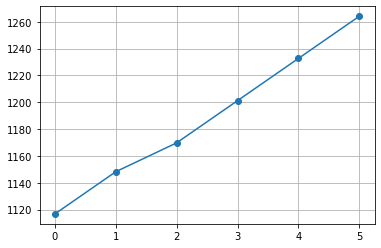

In [28]:
mn['adjust'].plot(marker='o')
plt.grid(True)

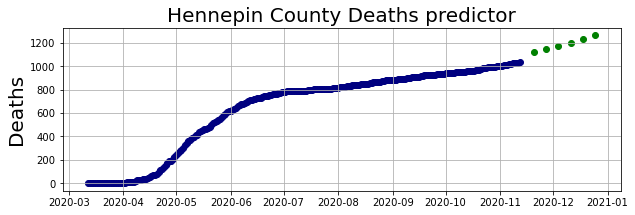

In [29]:
# Graph with Actual Values and Predicitons

plt.figure(figsize = (10, 3))
plt.scatter(mn['datetime'],mn['adjust'],c='g',)
plt.scatter(henn['datetime'],henn['deaths'],c='#000080',)
plt.grid(True)
plt.title('Hennepin County Deaths predictor', fontsize = 20)
plt.ylabel('Deaths', fontsize = 20)
plt.show()

Checking predictions using updated data

In [12]:
# check prediction# trying to upload raw csv
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv" # Make sure the url is the raw version of the file on GitHub
download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe

df = pd.read_csv(io.StringIO(download.decode('utf-8')))

#call sample
# Reading the downloaded content and turning it into a pandas dataframe

df.sample()

,date,county,state,fips,cases,deaths
67353,2020-04-17,Laramie,Wyoming,56021.0,93,1.0


In [ ]:
# find hennepin county and call sample
checking = df[(df['county']=='Hennepin') & (df['state']=='Minnesota')]
checking.tail(25)

In [ ]:
predict_weeks = {"day": [4, 11, 18, 25], "month": [ 12, 12, 12, 12], "year": [ 2020, 2020, 2020, 2020]}

In [31]:
actual = [1126, 1153,1288,1345] 
  
# Using 'Address' as the column name 
# and equating it to the list 
mn['actual_deaths'] = actual


In [22]:
mn

,day,month,year,datetime,predicted_deaths,actual_deaths
0,4,12,2020,2020-12-04,1249.060796,1153
1,11,12,2020,2020-12-11,1282.693625,1126
2,18,12,2020,2020-12-18,1316.326455,1288
3,25,12,2020,2020-12-25,1349.959284,1345


In [32]:
# extract needed columns
plot = mn[['predicted_deaths','actual_deaths']]

In [33]:
plot['date'] = ('12-4','12-11','12-18','12-25')

In [34]:
plot = plot.set_index('date')

In [35]:
plot

,predicted_deaths,actual_deaths
date,,
12-4,1249.060796,1126
12-11,1282.693625,1153
12-18,1316.326455,1288
12-25,1349.959284,1345


([<matplotlib.axis.XTick at 0x216d04cfb20>,
 [Text(0, 0, '12-4'),
  Text(0, 0, '12-11'),
  Text(0, 0, '12-18'),
  Text(0, 0, '12-25')])

<Figure size 432x288 with 0 Axes>

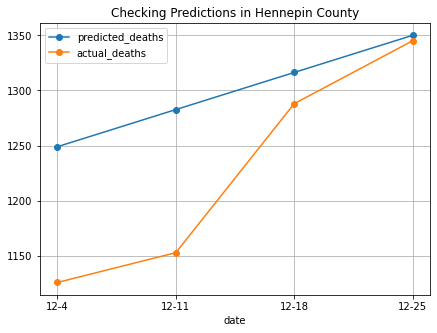

In [36]:
plt.figure();
plot.plot(marker='o',grid=True,figsize=(7,5),title= "Checking Predictions in Hennepin County")
plt.xticks(range(len(plot.index)), plot.index)